# 당뇨병 예측

* 피마 인디어(Pima Indians) 당뇨 데이터셋
> 미국 국립보건원 산하의 당뇨 소화 질병 센터가 제공하고 캐글을 통해 공개한 것
> 피마 인디언은 아리조나주에 살던 아메리카 원주민 부족이다. 이 부족은 유전적으로 당뇨에 취약해 당뇨 연구에 자주 활용됐다. 피마 인디언은 오랜 기근을 견딜 수 있는 유전자를 지닌 것으로 알려져 있으며, 이 유전자는 섭취한 포도당과 탄수화물을 체내에 저장해 기근이 잦았던 환경에서 살아남을 수 있게 도왔다. 
> 하지만 근대 사회로 접어든 후 가공 식품 위주로 식습관을 바꾸면서 피마 인디엉늬 제2형 당뇨 발병률이 증가했다. 지금도 제2형 당뇨 발병률은 전 세계에서 피마 인디언이 가장 높다. 그로 인해 피마 인디언을 대상으로 당뇨와 연관된 유전자를 찾으려는 연구도 활발하다. 
> <u><b>피마 인디언 당뇨 데이터셋은 몇몇 여성 피마 인디언의 의료 진단 자료와 진단 후 5년 내 당뇨 발병 여부로 구성된다.</b></u> 
  

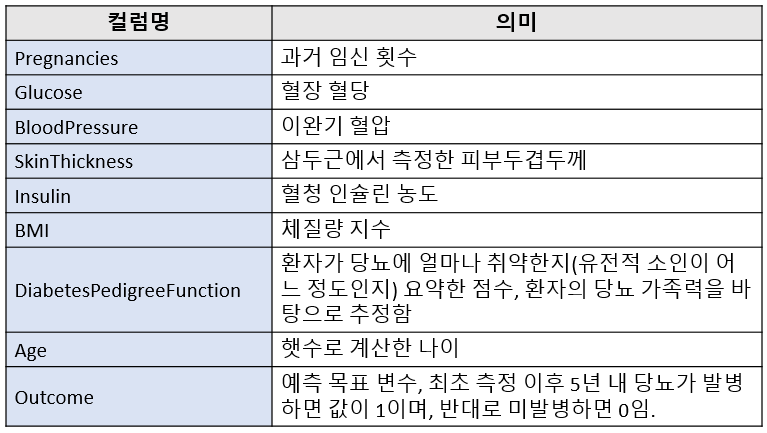

## 탐색적 데이터 분석

In [1]:
# 라이브러리 임포트

import pandas as pd

In [2]:
# ./data/diabetes.csv 파일을 읽어 df에 대입

df = pd.read_csv('./data/diabetes_raw.csv')

In [3]:
# df의 앞쪽 5개의 데이터 확인

df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


In [4]:
# df의 샘플 데이터 5개 확인

df.sample(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
541,3,128,72,25,190,32.4,0.549,27,1


In [6]:
# 몇행 몇열?

df.shape

(768, 9)

In [7]:
# df의 요약 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# 결측치 확인

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

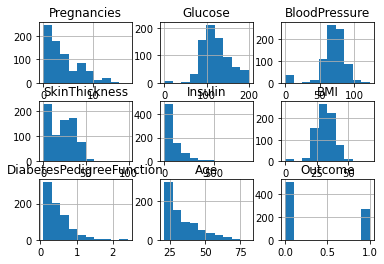

In [10]:
# df의 hist() 메소드를 이용하여 히스토그램을 시각해본다.

df.hist()

In [11]:
# matplotlib.pyplot임포트

import matplotlib.pyplot as plt

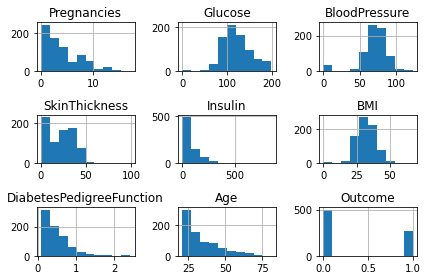

In [12]:
#  pypolt을 이용해 히스토그램을 좀더 잘 시각화해보기

df.hist()
plt.tight_layout()
plt.show()

* age 차트를 보면 젊은 환자가 대부분이고 특히 20대와 30대가 가장 많다는 것을 알수 있다.
* BMI, BloodPressure, Glucose 분포는 인구 관련 통계에서 흔히 볼 수 있는 종모양의 정규분포를 이루고 있음을 알 수 있다.
* Glucose 분포에는 다소 극단적인 값이 보이는데, 혈장 혈당이 무려 200에 가까운 환자도 있다.
* 반면 BMI, BloodPressure, Glucose 값이 0인 환자도 있다. 하지만 이 수치들은 0이 될 수 없으며 결측치일 확률이 높다.
* Pregnancies 분포에도 일부 이상치(outlier)가 있는데 이 중에는 심지어 15번 임신한 사람도 있다. 물론 불가능한 일은 아니지만 이상치는 예측 결과를 왜곡할 수 있기 때문에 분석에 항상 유의해야한다.


<AxesSubplot:ylabel='Frequency'>

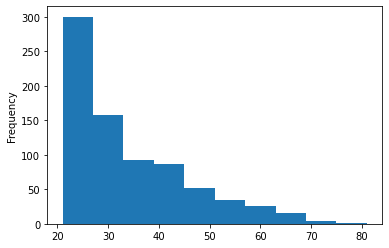

In [13]:
# df의 'Age'열을 선택해 히스토그램을 시각화해본다.

df['Age'].plot.hist()

<AxesSubplot:ylabel='Density'>

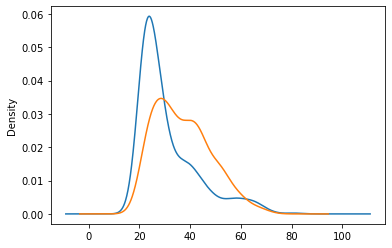

In [5]:
# 당뇨병에 걸리지 않은 사람의 'Age'를 확률밀도함수로 시각화해보기
# 당뇨병에 걸린 사람의 'Age'를 확률밀도함수로 시각화해보기

df.loc[df['Outcome'] == 0, 'Age'].plot.kde()
df.loc[df['Outcome'] == 1, 'Age'].plot.kde()

<AxesSubplot:>

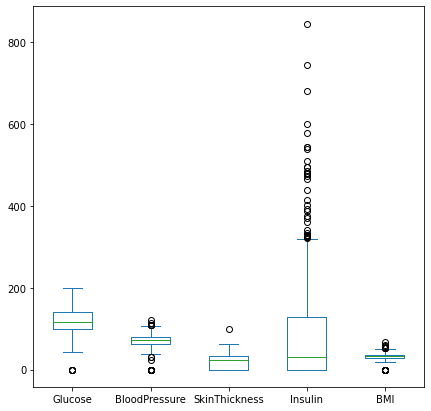

In [6]:
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' 데이터를 박스플롯으로 시각화해본다.

df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].plot.box(figsize=(7,7))

<AxesSubplot:>

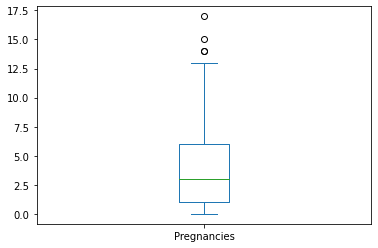

In [7]:
# Pregnancies 데이터를 박스플롯으로 시각화해본다.

df['Pregnancies'].plot.box()

<AxesSubplot:>

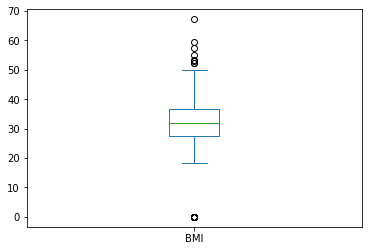

In [8]:
# BMI 데이터를 박스플롯으로 시각화해본다.

df['BMI'].plot.box()

In [9]:
# Outcome 열의 데이터 분포 확인하기

df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

* 65%가 0번 즉, 미발병이고, 나머지 35%가 1번 즉, 당뇨발병이다.

* 히스토그램을 보면 변수 값의 범위가 서로 다르다는 것을 알 수 있다. 예를 들어 DiabetesPedigreeFunction 변수 값은 0에서 2.5 사이인 반면, Insulin 변수 값은 0에서 800 사이이다. 변수마다 범위가 다르면 신경망을 훈련시킬 때 문제가 발생할 수 있는데, 범위가 큰 변수가 작은 변수보다 예측에 더 큰 영향을 미치기 때문이다. 

## 데이터 전처리

* 데이터셋의 일부 컬럼 값이 0이고 변수의 범위가 서로 달라 모델 성능에 악영향을 줄 수 있다. 데이터를 전처리하여 이문제를 해결한다.
 

### 결측치 처리

In [10]:
# df의 결측치 확인

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

* 결측치를 확인한 결과 마치 결측치가 없는 것처럼 보인다.

In [11]:
# df의 기술통계정보를 확인한다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* 총 768개의 데이터가 있고 Pregnancies, Glucose, BloodPressure, SkinTickness, Insulin, BMI 컬럼의 최소값이 모두 0이다. 하지만 이들 수치는 0이 될 수가 없으므로 0값은 결측치임을 알 수 있다.

In [12]:
# Pregnancies 컬럼의 데이터값이 0인 행의 개수 구하기

df.loc[df['Pregnancies'] == 0].shape[0]

111

In [13]:
# df의 컬럼 명들을 변수 columns에 대입

columns = df.columns

In [14]:
# for문으로 모든 컬럼들에 대해 컬럼의 데이터 값이 0인 행의 개수를 구한다.

for col in columns:
    count = df.loc[df[col] == 0].shape[0]
    print(col, count)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


* Insulin 컬럼에 0이 374개가 있다. Insulin 값이 0인 행을 제거하면 모델의 성능이 크게 나빠질 것이다.
따라서 정상적인 데이터의 평균, 중앙값 또는 최빈값으로 결측치를 대체하는 것이 낫다.
* Glucose, BloodPressure, SkinThickness, Insulin, BMI는 모두 연속 변수이므로 평균값을 구해 결측치를 대체하도록 한다.
* 0을 NaN으로 바꿔서 결측치를 인식할 수 있게 한다.

In [15]:
# 결측치를 처리할 컬럼명들을 리스트에 담아 변수 change_columns 에 대입한다.

change_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [16]:
# NaN처리를 위해 numpy를 임포트한다.

import numpy as np

In [17]:
# for 문을 이용하여 change_columns에 있는 컬럼들의 데이터 중 0을 NaN으로 바꾼다.

for c in change_columns:
    df[c] = df[c].replace(0, np.nan)

In [18]:
# df의 요약정보를 확인한다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [33]:
# df의 결측치를 확인한다.

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
# df의 기술통계 정보를 확인한다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* df의 결측치를 처리한다. 즉 NaN을 평균값으로 대체한다.

In [35]:
# chagne_colums를 확인한다.

change_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [36]:
# for문을 이용하여 결측치를 처리할 컬럼들의 NaN을 각 컬럼의 평균값으로 대체한다.

for c in change_columns:
    df[c]= df[c].fillna(df[c].mean())

In [37]:
# df의 요약 정보를 확인하다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [38]:
# df의 결측치를 확인한다.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [39]:
# df의 기술통계 정보를 확인한다.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 데이터 표준화
* 데이터셋의 각 숫자 변수를 평균이 0, 분산이 1이 되도록 변환하는 데이터 전처리 과정이다.
* 앞서 살펴봤듯이 Insulin과 DiabetesPedigreeFunction 변수는 범위가 크게 다르다. Insulin의 최대값이 846인 반면에 DiabetesPedigreeFunction의 최대값은 2.42이다. 이 정도로 범위가 다른 데이터셋으로 신경망을 훈력시키면 범위가 큰 변수가 더 강하게 작용해 신경망이 이 변수에 더 중심을 두게 된다. 따라서 데이터 표준화가 필요하다.
* 데이터 표준화는 사이킷런의 preprocessing 클래스를 사용해 수행할 수 있다.

In [40]:
# sklearn.preprocessing을 임포트한다.

from sklearn import preprocessing

In [42]:
# preprocessing.scale() 메소드를 이용하여 df를 표준화한다.
# 결과를 df_scaled 변수에 대입한다.

df_scaled = preprocessing.scale(df)
df_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [44]:
# preprocessing.scale() 메소드는 판다스의 DataFrame이 아닌 다른 객체를 반환하므로 결과를 다시 DataFrame객체로 변환한다.

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,-0.732120
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1.365896


In [45]:
# Outcome컬럼은 우리가 알고자 하는 값이므로 표준화 할 필요가 없다.
# df_scaled의 Outcome컬럼을 df의 Outcome컬럼으로 바꾸자.

df_scaled['Outcome'] = df['Outcome']
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1


In [48]:
# df_scaled.describe().loc[['mean', 'std', 'max']].round(2).abs()

df_scaled.describe().loc[['mean', 'std', 'max']].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [52]:
# df_scaled를 Test.csv파일로 저장하기

df_scaled.to_csv('./data/diabetes.csv')

In [51]:
# df_scaled확인

df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,0
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,0
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,0
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1
